# Deep learning 
In this workbook, we will go through some examples of deep learning tasks.
To get started, we will work our way through yolo v11. This is the latest and greatest yolo implementation, and can perform classification, detection, segmentation, tracking and pose estimation.

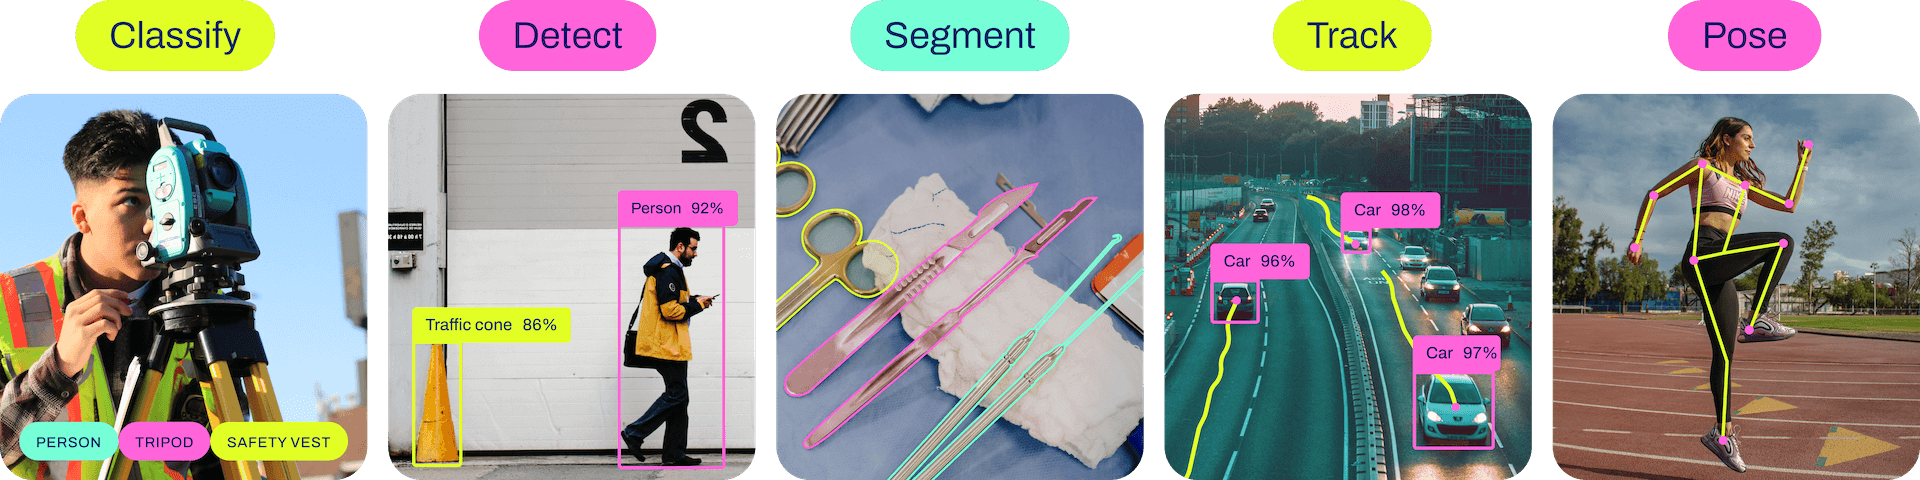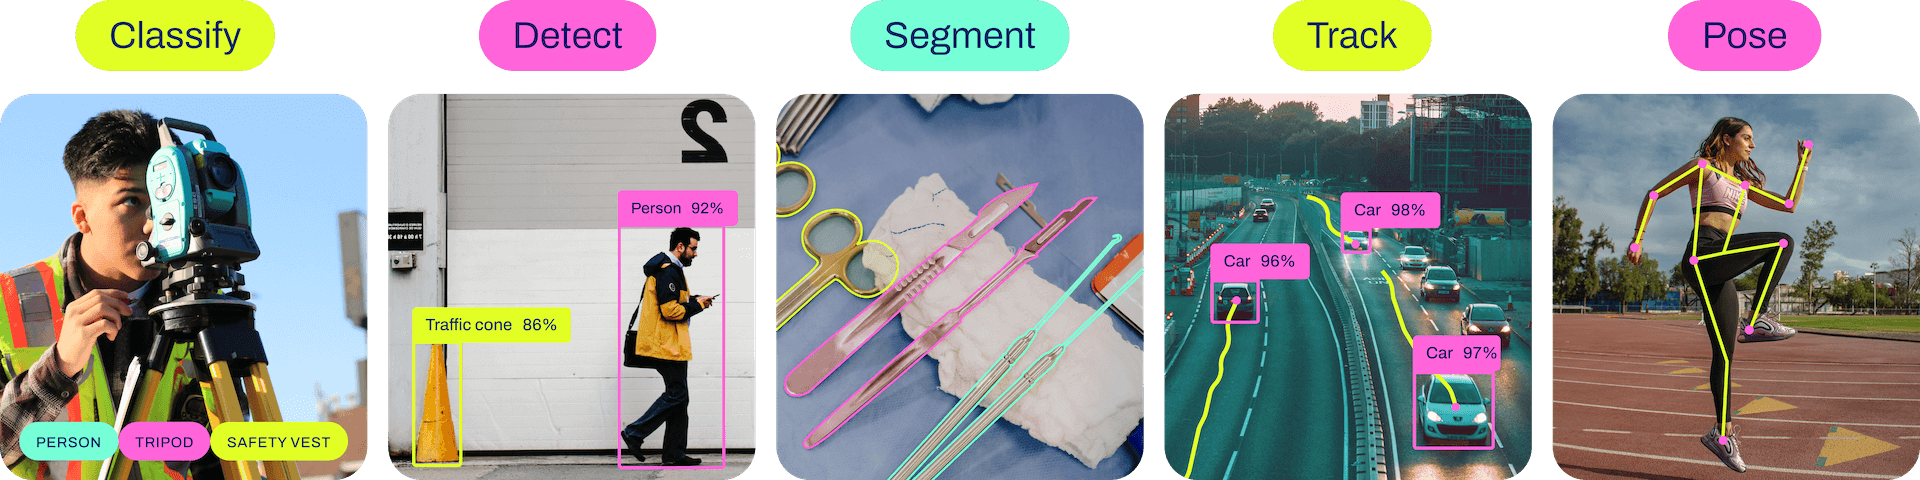

There are 5 versions of the model ranging from the nano version to the x version, with a direct correlation between performance and model size.

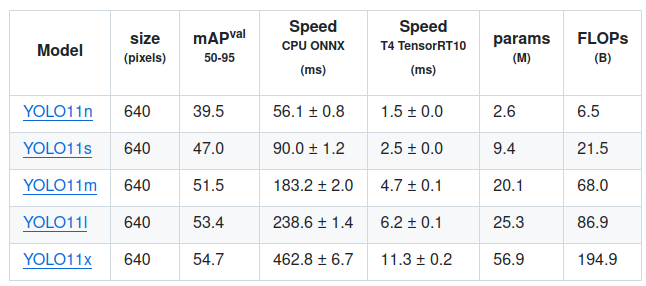

Full documentation is here: https://docs.ultralytics.com/models/yolo11/

Github: https://github.com/ultralytics/ultralytics

Much of this workbook is taken from this Colab tutorial: https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb

Another good resource: https://docs.ultralytics.com/modes/predict/#__tabbed_2_12




# Setup
Pip install ultralytics, and check software and hardware

Note: this will take a while to install on first run

In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.24 🚀 Python-3.12.7 torch-2.5.0+cu124 CPU (Intel Core(TM) Ultra 5 125U)
Setup complete ✅ (12 CPUs, 23.1 GB RAM, 32.2/39.7 GB disk)


# Detection
YOLO11 detection models have no suffix and are the default YOLO11 models, i.e. yolo11n.pt and are pretrained on COCO. Try varying the model version and see the difference in performance. 

In [17]:
# Load a model
model = YOLO("yolo11n.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model('https://ultralytics.com/images/bus.jpg')  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/robotics/Documents/EE5110/bus.jpg: 640x480 4 persons, 1 bus, 108.6ms
Speed: 5.1ms preprocess, 108.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


# Segmentation
In this example, we'll stream a video and run segmentation on it

In [18]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n-seg.pt")

# Define source as YouTube video URL
source = "classroom.mp4"

# Run inference on the source
results = model(source, stream=True, save=True)  # generator of Results objects

In [22]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")
for r in model.predict(source="classroom.mp4", save=True, stream=True, save_txt=True):
    pass


video 1/1 (frame 1/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 1 bottle, 1 cup, 8 chairs, 1 couch, 1 dining table, 121.7ms
video 1/1 (frame 2/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 8 chairs, 1 couch, 1 dining table, 119.6ms
video 1/1 (frame 3/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 1 cup, 8 chairs, 1 couch, 1 dining table, 89.3ms
video 1/1 (frame 4/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 8 chairs, 1 couch, 1 dining table, 83.3ms
video 1/1 (frame 5/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 8 chairs, 1 couch, 1 dining table, 71.8ms
video 1/1 (frame 6/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 8 chairs, 1 couch, 1 dining table, 89.1ms
video 1/1 (frame 7/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 8 chairs, 1 couch, 1 dining table, 191.3ms
video 1/1 (frame 8/984) /home/robotics/Documents

# Pose
In this example, we'll run pose detection on a video

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-pose.pt")  # load an official model

# predict pose
for r in model.predict(source="classroom.mp4", save=True, stream=True, save_txt=True):
    pass


video 1/1 (frame 1/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 66.4ms
video 1/1 (frame 2/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 90.3ms
video 1/1 (frame 3/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 64.4ms
video 1/1 (frame 4/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 57.5ms
video 1/1 (frame 5/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 68.3ms
video 1/1 (frame 6/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 72.7ms
video 1/1 (frame 7/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 84.6ms
video 1/1 (frame 8/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 69.1ms
video 1/1 (frame 9/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 66.2ms
video 1/1 (frame 10/984) /home/robotics/Documents/EE5110/classroom.mp4: 384x640 4 persons, 75.4ms
video 1/1 (frame 11/984) /ho

# Tracking
In this example, we will use yolov11 for tracking. This can be done with detection, segmentation and pose.

In [16]:
from ultralytics import YOLO

# Load an official or custom model
model = YOLO("yolo11l.pt")  # Load an official Detect model
#model = YOLO("yolo11n-seg.pt")  # Load an official Segment model
#model = YOLO("yolo11n-pose.pt")  # Load an official Pose model

# Perform tracking with the model
#for r in model.track(source="person-bicycle-car-detection.mp4", save=True, stream=True, save_txt=True):
#    pass

# use the bytretrack tracker
for r in model.track(source="person-bicycle-car-detection.mp4", save=True, stream=True, save_txt=True, tracker="bytetrack.yaml"):
    pass


100%|██████████| 49.0M/49.0M [00:01<00:00, 31.0MB/s]



video 1/1 (frame 1/647) /home/robotics/Documents/EE5110/person-bicycle-car-detection.mp4: 384x640 (no detections), 344.2ms
video 1/1 (frame 2/647) /home/robotics/Documents/EE5110/person-bicycle-car-detection.mp4: 384x640 (no detections), 277.5ms
video 1/1 (frame 3/647) /home/robotics/Documents/EE5110/person-bicycle-car-detection.mp4: 384x640 (no detections), 293.4ms
video 1/1 (frame 4/647) /home/robotics/Documents/EE5110/person-bicycle-car-detection.mp4: 384x640 (no detections), 308.5ms
video 1/1 (frame 5/647) /home/robotics/Documents/EE5110/person-bicycle-car-detection.mp4: 384x640 (no detections), 276.4ms
video 1/1 (frame 6/647) /home/robotics/Documents/EE5110/person-bicycle-car-detection.mp4: 384x640 (no detections), 279.6ms
video 1/1 (frame 7/647) /home/robotics/Documents/EE5110/person-bicycle-car-detection.mp4: 384x640 (no detections), 283.9ms
video 1/1 (frame 8/647) /home/robotics/Documents/EE5110/person-bicycle-car-detection.mp4: 384x640 (no detections), 316.1ms
video 1/1 (fram

# ONNX example
ONNX, or Open Neural Network Exchange, is an open-source format for representing machine learning models, designed to enable interoperability between various deep learning frameworks, including PyTorch, TensorFlow, and others. Initially developed by Microsoft and Facebook in 2017, ONNX has since become a widely adopted standard for deploying models across platforms.

### Key Advantages of ONNX:
- Interoperability: ONNX allows models developed in one framework to be exported and run in another, facilitating collaboration and flexibility in model deployment.
- Cross-Platform Support: Models in ONNX format can run on diverse hardware, such as CPUs, GPUs, and specialized chips, making it ideal for environments with different hardware capabilities.
- Optimized Inference: With tools like ONNX Runtime, models in ONNX format can often achieve faster inference speeds due to optimizations for various hardware architectures.
- Community and Ecosystem Support: ONNX has a broad ecosystem of tools and libraries that enhance model conversion, deployment, and optimization, benefiting from strong community support and regular updates.

### Applications of ONNX:
- Model Deployment: Used extensively in deploying models to production, particularly when flexibility is needed in switching between frameworks or hardware.
- Edge and Mobile AI: ONNX’s lightweight and optimized format makes it ideal for deploying machine learning models on edge devices with limited resources.
- Cross-Platform Research: Researchers use ONNX to collaborate on models without being constrained by their choice of deep learning framework.
- Optimization and Acceleration: ONNX Runtime allows for optimizations that improve model inference time, making it popular in applications requiring real-time processing, such as image and speech recognition.

In [20]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("yolo11n.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolo11n.onnx'

# Load the exported ONNX model
onnx_model = YOLO("yolo11n.onnx")

# Run inference
results = onnx_model("https://ultralytics.com/images/bus.jpg")

Ultralytics 8.3.24 🚀 Python-3.12.7 torch-2.5.0+cu124 CPU (Intel Core(TM) Ultra 5 125U)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.36...
ONNX: export success ✅ 0.9s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (1.3s)
Results saved to /home/robotics/Documents/EE5110
Predict:         yolo predict task=detect model=yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo11n.onnx for ONNX Runtime inference...

Found https://ultr

# SSD detector
In this example, we'll run an alternative to yolo - SSD with a Mobilnet backbone

In [37]:
!pip install opencv-python-headless onnxruntime numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 37.5 MB/s eta 0:00:000:00:010:00:01:01


In [81]:
# Project: How to Detect Objects in Video Using MobileNet SSD in OpenCV
# Author: Addison Sears-Collins
# Date created: March 1, 2021
# Description: Object detection using OpenCV
 
import cv2 # Computer vision library
import numpy as np # Scientific computing library 
 
# Make sure the video file is in the same directory as your code
filename = 'person-bicycle-car-detection.mp4'
file_size = (1920,1080) # Assumes 1920x1080 mp4
 
# We want to save the output to a video file
output_filename = 'SSD/person-bicycle-car-detection_detect_mobssd.mp4'
output_frames_per_second = 20.0
 
RESIZED_DIMENSIONS = (300, 300) # Dimensions that SSD was trained on. 
IMG_NORM_RATIO = 0.007843 # In grayscale a pixel can range between 0 and 255
 
# Load the pre-trained neural network
neural_network = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 
        'MobileNetSSD_deploy.caffemodel')
 
# List of categories and classes
categories = { 0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 
               4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 
               9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 
              13: 'horse', 14: 'motorbike', 15: 'person', 
              16: 'pottedplant', 17: 'sheep', 18: 'sofa', 
              19: 'train', 20: 'tvmonitor'}
 
classes =  ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", 
            "bus", "car", "cat", "chair", "cow", 
           "diningtable",  "dog", "horse", "motorbike", "person", 
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]
                      
# Create the bounding boxes
bbox_colors = np.random.uniform(255, 0, size=(len(categories), 3))
     


In [83]:
# Load a video
cap = cv2.VideoCapture(filename)

# Create a VideoWriter object so we can save the video output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
result = cv2.VideoWriter(output_filename, fourcc, output_frames_per_second, file_size)

# Process the video
while cap.isOpened():
    # Capture one frame at a time
    success, frame = cap.read() 
    
    # Do we have a video frame? If true, proceed.
    if success:
         
      # Capture the frame's height and width
      (h, w) = frame.shape[:2]
    
      # Create a blob. A blob is a group of connected pixels in a binary 
      # frame that share some common property (e.g. grayscale value)
      # Preprocess the frame to prepare it for deep learning classification
      frame_blob = cv2.dnn.blobFromImage(cv2.resize(frame, RESIZED_DIMENSIONS), 
                     IMG_NORM_RATIO, RESIZED_DIMENSIONS, 127.5)
     
      # Set the input for the neural network
      neural_network.setInput(frame_blob)
    
      # Predict the objects in the image
      neural_network_output = neural_network.forward()
    
      # Put the bounding boxes around the detected objects
      for i in np.arange(0, neural_network_output.shape[2]):
             
        confidence = neural_network_output[0, 0, i, 2]
     
        # Confidence must be at least 30%       
        if confidence > 0.30:
                 
          idx = int(neural_network_output[0, 0, i, 1])
    
          bounding_box = neural_network_output[0, 0, i, 3:7] * np.array(
            [w, h, w, h])
    
          (startX, startY, endX, endY) = bounding_box.astype("int")
    
          label = "{}: {:.2f}%".format(classes[idx], confidence * 100) 
         
          cv2.rectangle(frame, (startX, startY), (
            endX, endY), bbox_colors[idx], 2)     
                         
          y = startY - 15 if startY - 15 > 15 else startY + 15    
    
          cv2.putText(frame, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 
            0.5, bbox_colors[idx], 2)
         
      # We now need to resize the frame so its dimensions
      # are equivalent to the dimensions of the original frame
      frame = cv2.resize(frame, file_size, interpolation=cv2.INTER_NEAREST)
    
            # Write the frame to the output video file
      result.write(frame)
         
    # No more video frames left
    else:
      break
             
# Stop when the video is finished
cap.release()
     
    # Release the video recording
result.release()
    


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# Vision Transformer
Finally, we'll run Ultralytics version of vision transformer RT-DETR.

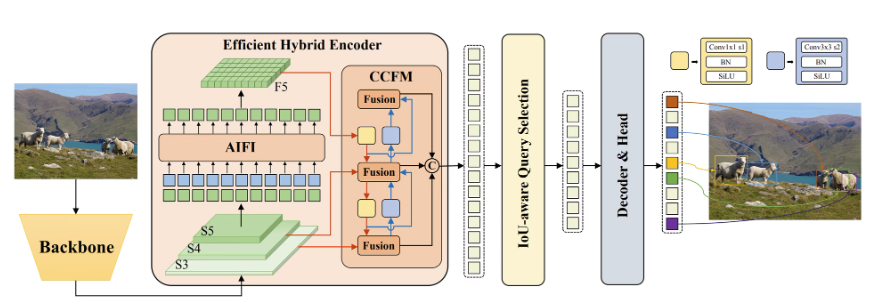


The RT-DETR model architecture diagram shows the last three stages of the backbone {S3, S4, S5} as the input to the encoder. The efficient hybrid encoder transforms multiscale features into a sequence of image features through intrascale feature interaction (AIFI) and cross-scale feature-fusion module (CCFM). The IoU-aware query selection is employed to select a fixed number of image features to serve as initial object queries for the decoder. Finally, the decoder with auxiliary prediction heads iteratively optimizes object queries to generate boxes and confidence scores (source).

In [89]:
from ultralytics import RTDETR

# Load a COCO-pretrained RT-DETR-l model
model = RTDETR('rtdetr-l.pt')

for r in model.predict(source="classroom.mp4", save=True, stream=True, save_txt=True):
    pass

100%|██████████| 63.4M/63.4M [00:02<00:00, 27.4MB/s]



video 1/1 (frame 1/984) /home/robotics/Documents/EE5110/classroom.mp4: 640x640 4 persons, 1 backpack, 15 chairs, 4 dining tables, 3 tvs, 1 refrigerator, 914.8ms
video 1/1 (frame 2/984) /home/robotics/Documents/EE5110/classroom.mp4: 640x640 4 persons, 16 chairs, 4 dining tables, 3 tvs, 1 refrigerator, 678.6ms
video 1/1 (frame 3/984) /home/robotics/Documents/EE5110/classroom.mp4: 640x640 4 persons, 15 chairs, 4 dining tables, 3 tvs, 1 refrigerator, 720.6ms
video 1/1 (frame 4/984) /home/robotics/Documents/EE5110/classroom.mp4: 640x640 4 persons, 15 chairs, 4 dining tables, 3 tvs, 1 refrigerator, 686.3ms
video 1/1 (frame 5/984) /home/robotics/Documents/EE5110/classroom.mp4: 640x640 4 persons, 16 chairs, 4 dining tables, 3 tvs, 1 refrigerator, 677.2ms
video 1/1 (frame 6/984) /home/robotics/Documents/EE5110/classroom.mp4: 640x640 4 persons, 15 chairs, 4 dining tables, 3 tvs, 1 refrigerator, 679.8ms
video 1/1 (frame 7/984) /home/robotics/Documents/EE5110/classroom.mp4: 640x640 4 persons, 15 